# Prosper Loan Data Exploration


## Preliminary Wrangling

> This document explores a dataset containing loan information of approximately 113938 loans provided to people for various reasons.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loan.shape)

(113937, 81)


In [4]:
print(loan.dtypes)

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [5]:
print(loan.head(1))

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0         0.158        0.138    ...            -133.18                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  

[1 rows x 81 columns]


In [6]:
# Remove columns that are not necessary in this analysis by dropping it
loandf = loan.copy()
loandf.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatusDuration', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'IncomeRange', 'IncomeVerifiable', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors'], axis = 1, inplace = True) 

In [7]:
loandf.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment
0,36,Completed,0.16516,0.1580,Self-employed,True,640.0,659.0,4.0,0.17,3083.333333,NaN,19141,9425,330.43
1,36,Current,0.12016,0.0920,Employed,False,680.0,699.0,14.0,0.18,6125.000000,NaN,134815,10000,318.93
2,36,Completed,0.28269,0.2750,Not available,False,480.0,499.0,NaN,0.06,2083.333333,NaN,6466,3001,123.32
3,36,Current,0.12528,0.0974,Employed,True,800.0,819.0,5.0,0.15,2875.000000,NaN,77296,10000,321.45
4,36,Current,0.24614,0.2085,Employed,True,680.0,699.0,19.0,0.26,9583.333333,0.0,102670,15000,563.97


In [8]:
loandf.shape

(113937, 15)

In [9]:
# Determine duplicated rows
loandf[loandf.duplicated()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment
9,36,Current,0.07620,0.0629,Employed,True,820.0,839.0,16.0,0.25,3333.333333,NaN,121268,10000,305.54
999,60,Current,0.17710,0.1535,Employed,True,760.0,779.0,16.0,0.35,3750.000000,NaN,132043,10000,239.74
2539,60,Current,0.14528,0.1224,Employed,True,720.0,739.0,18.0,0.18,10833.333333,NaN,135375,35000,782.81
4942,36,Current,0.35356,0.3134,Employed,True,640.0,659.0,6.0,0.07,4583.333333,NaN,103928,4000,172.76
5812,36,Current,0.24205,0.2045,Other,True,700.0,719.0,18.0,0.62,4166.666667,NaN,110525,15000,560.90
5971,60,Current,0.18555,0.1620,Employed,False,680.0,699.0,16.0,0.26,3750.000000,NaN,106952,10000,244.24
6385,36,Current,0.11563,0.0879,Employed,True,700.0,719.0,8.0,0.25,14166.666667,0.0,127050,10000,317.02
7415,60,Current,0.24589,0.2209,Employed,True,680.0,699.0,10.0,0.25,5416.666667,NaN,108650,10000,276.70
7538,36,Current,0.20524,0.1685,Employed,True,680.0,699.0,9.0,0.18,12916.666667,NaN,122367,5000,177.89
7555,36,Current,0.12691,0.0990,Self-employed,False,700.0,719.0,11.0,NaN,3666.666667,0.0,122869,10000,322.20


In [10]:
# Remove duplicated rows, keeping just the first out of 2 or more duplicated value
loandf.drop_duplicates(keep = 'first', inplace = True)

In [11]:
# Check if the 871 duplicated values are removed 
loandf.shape

(113066, 15)

In [12]:
# Check again if the duplicated values are removed by specifically checking if the duplicates of LoanNumber = 121268 are removed
loandf[loandf.LoanNumber == 121268]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment
8,36,Current,0.0762,0.0629,Employed,True,820.0,839.0,16.0,0.25,3333.333333,NaN,121268,10000,305.54


In [13]:
# Check for incomplete data in 'StatedMonthlyIncome'
loandf[loandf.StatedMonthlyIncome == 0]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment
78,36,Chargedoff,0.18454,0.1700,Full-time,True,720.0,739.0,14.0,NaN,0.0,0.0,33852,4800,171.13
100,36,Chargedoff,0.35356,0.3134,Not employed,False,720.0,739.0,3.0,NaN,0.0,0.0,82947,4000,172.76
108,36,Completed,0.28320,0.2600,Full-time,False,640.0,659.0,8.0,NaN,0.0,NaN,30830,14000,564.07
125,36,Current,0.35643,0.3199,Not employed,False,640.0,659.0,7.0,NaN,0.0,NaN,49793,5000,217.74
170,36,Completed,0.28851,0.2499,Not employed,True,760.0,779.0,7.0,NaN,0.0,NaN,63781,10000,397.55
186,36,Chargedoff,0.35797,0.3177,Not employed,False,660.0,679.0,3.0,NaN,0.0,NaN,60674,4000,173.71
332,36,Cancelled,0.25650,0.2375,NaN,True,520.0,539.0,NaN,0.10361,0.0,NaN,668,1000,39.10
335,36,Completed,0.35797,0.3177,Not employed,False,760.0,779.0,1.0,NaN,0.0,NaN,62667,2000,86.85
688,36,Completed,0.30532,0.2699,Not employed,False,720.0,739.0,5.0,NaN,0.0,NaN,51593,2500,102.05
772,36,Completed,0.10491,0.0980,Full-time,True,820.0,839.0,8.0,NaN,0.0,NaN,29671,3500,112.61


In [14]:
# If 'StatedMonthlyIncome' = 0, then we can drop these incomplete data since it does not make sense to predict loan repayment based on 0 income
index_names = loandf[loandf.StatedMonthlyIncome == 0 ].index
loandf.drop(index_names, inplace = True)

In [15]:
# Ensure that 'StatedMonthlyIncome' = 0 rows has been removed
loandf[loandf.StatedMonthlyIncome == 0]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment


In [16]:
# Check for incomplete data in 'DebtToIncomeRatio'
loandf[loandf.DebtToIncomeRatio.isnull()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment
40,60,Current,0.19630,0.1725,Self-employed,False,680.0,699.0,9.0,NaN,12750.000000,NaN,129161,15000,374.81
69,60,Current,0.13636,0.1139,Self-employed,True,700.0,719.0,5.0,NaN,2700.000000,0.0,128889,9000,197.44
103,36,Chargedoff,0.26681,0.2287,Self-employed,True,680.0,699.0,7.0,NaN,5000.000000,0.0,63925,15000,579.63
105,36,Chargedoff,0.30532,0.2699,Employed,False,640.0,659.0,4.0,NaN,2666.666667,NaN,52871,2000,81.64
131,36,Completed,0.20623,0.1915,Part-time,False,740.0,759.0,7.0,NaN,833.333333,NaN,36914,12500,459.15
174,36,Current,0.09988,0.0864,Employed,False,720.0,739.0,14.0,NaN,7083.333333,0.0,82799,3600,113.88
183,36,Current,0.13697,0.1089,Employed,True,680.0,699.0,15.0,NaN,6000.000000,0.0,77823,2000,65.37
185,36,Defaulted,0.27119,0.2365,Self-employed,True,860.0,879.0,5.0,NaN,3333.333333,NaN,43843,6000,234.30
204,60,Current,0.27246,0.2468,Employed,True,780.0,799.0,8.0,NaN,5000.000000,NaN,60321,10000,291.64
209,36,Current,0.31790,0.2786,Employed,True,700.0,719.0,15.0,NaN,7916.666667,NaN,94377,4000,165.15


In [17]:
# Predicting the loan outcome status and interest values with missing DebtToIncomeRatio value is not practical/hard.
# Remove rows with no/missing (NaN) DebtToIncomeRatio value
index_names = loandf[loandf.DebtToIncomeRatio.isnull()].index
loandf.drop(index_names, inplace = True)

In [18]:
# Ensure that 'DebtToIncomeRatio' = NaN rows has been removed
loandf[loandf.DebtToIncomeRatio.isnull()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment


In [19]:
# Check if OpenCreditLines column has NaN value
loandf[loandf.OpenCreditLines.isnull()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment
2,36,Completed,0.28269,0.2750,Not available,False,480.0,499.0,NaN,0.06000,2083.333333,NaN,6466,3001,123.32
17,36,Chargedoff,0.13202,0.1250,Not available,True,760.0,779.0,NaN,0.12000,5833.333333,NaN,2711,10000,334.54
39,36,Completed,0.15211,0.1450,NaN,False,680.0,699.0,NaN,0.06000,9583.333333,NaN,1901,10000,57.64
42,36,Chargedoff,0.30300,0.2900,Not available,False,520.0,539.0,NaN,0.27000,416.666667,NaN,7286,1500,62.86
63,36,Completed,0.29776,0.2900,Not available,True,620.0,639.0,NaN,0.25000,7500.000000,NaN,3919,6000,251.43
76,36,Completed,0.25861,0.2500,Not available,True,540.0,559.0,NaN,0.13000,8583.333333,NaN,2028,2200,87.47
90,36,Completed,0.19178,0.1845,Not available,True,600.0,619.0,NaN,0.13000,1833.333333,NaN,4647,5000,181.89
92,36,Completed,0.08292,0.0755,NaN,True,820.0,839.0,NaN,0.08000,10833.333333,NaN,1808,2300,71.60
122,36,Completed,0.08718,0.0700,Not available,False,720.0,739.0,NaN,0.13000,1666.666667,NaN,1752,1000,30.88
128,36,Defaulted,0.18824,0.1700,Not available,True,500.0,519.0,NaN,0.03000,2916.666667,NaN,4690,1000,35.65


In [20]:
# In OpenCreditLines column,replace NaN value with 0
loandf.OpenCreditLines = loandf.OpenCreditLines.fillna(0)

In [21]:
# Ensure OpenCreditLines column has No NaN value
loandf[loandf.OpenCreditLines.isnull()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment


In [22]:
# Check if NaN value exists in CreditScoreRangeLower column
loandf[loandf.CreditScoreRangeLower.isnull()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment
206,36,Defaulted,0.27767,0.2700,NaN,False,NaN,NaN,0.0,0.16573,9166.666667,NaN,323,7500,306.19
387,36,Completed,0.09337,0.0865,NaN,False,NaN,NaN,0.0,0.12624,3000.000000,NaN,174,3500,110.73
698,36,Completed,0.07680,0.0700,NaN,False,NaN,NaN,0.0,0.02727,8333.333333,NaN,36,6001,185.29
1023,36,Completed,0.08684,0.0800,NaN,False,NaN,NaN,0.0,0.02480,8333.333333,NaN,396,5000,156.68
1126,36,Completed,0.20735,0.2000,NaN,False,NaN,NaN,0.0,0.13759,4250.000000,NaN,202,2550,94.77
1148,36,Completed,0.10692,0.1000,NaN,False,NaN,NaN,0.0,0.07305,2666.666667,NaN,109,3000,95.24
1907,36,Completed,0.11094,0.1040,NaN,False,NaN,NaN,0.0,0.19644,4166.666667,NaN,191,5500,128.07
1932,36,Defaulted,0.18658,0.1775,NaN,False,NaN,NaN,0.0,0.01087,6628.583333,NaN,444,2000,72.05
2029,36,Completed,0.13956,0.1325,NaN,False,NaN,NaN,0.0,0.10841,8333.333333,NaN,351,3000,101.44
2040,36,Completed,0.10133,0.0840,NaN,False,NaN,NaN,0.0,0.14752,3399.666667,NaN,510,1000,31.52


In [23]:
# remove rows with CreditScoreRangeLower = NaN, since it does not help in predicting interest rate when credit score is missing.
index_names = loandf[loandf.CreditScoreRangeLower.isnull()].index
loandf.drop(index_names, inplace = True)

In [24]:
# Ensure that all rows with CreditScoreRangeLower = NaN has been removed
loandf[loandf.CreditScoreRangeLower.isnull()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment


In [25]:
# Check if rows with CreditScoreRangeUpper = NaN exists
loandf[loandf.CreditScoreRangeUpper.isnull()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment


In [26]:
# Check if NaN value exists in ProsperPaymentsOneMonthPlusLate column
loandf[loandf.ProsperPaymentsOneMonthPlusLate.isnull()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment
0,36,Completed,0.16516,0.1580,Self-employed,True,640.0,659.0,4.0,0.17,3083.333333,NaN,19141,9425,330.43
1,36,Current,0.12016,0.0920,Employed,False,680.0,699.0,14.0,0.18,6125.000000,NaN,134815,10000,318.93
2,36,Completed,0.28269,0.2750,Not available,False,480.0,499.0,0.0,0.06,2083.333333,NaN,6466,3001,123.32
3,36,Current,0.12528,0.0974,Employed,True,800.0,819.0,5.0,0.15,2875.000000,NaN,77296,10000,321.45
5,60,Current,0.15425,0.1314,Employed,True,740.0,759.0,17.0,0.36,8333.333333,NaN,123257,15000,342.37
6,36,Current,0.31032,0.2712,Employed,False,680.0,699.0,7.0,0.27,2083.333333,NaN,88353,3000,122.67
7,36,Current,0.23939,0.2019,Employed,False,700.0,719.0,6.0,0.24,3355.750000,NaN,90051,10000,372.60
8,36,Current,0.07620,0.0629,Employed,True,820.0,839.0,16.0,0.25,3333.333333,NaN,121268,10000,305.54
10,60,Current,0.27462,0.2489,Employed,False,640.0,659.0,2.0,0.12,7500.000000,NaN,65946,13500,395.37
11,36,Completed,0.15033,0.1325,Full-time,False,640.0,659.0,2.0,0.27,1666.666667,NaN,20907,1000,33.81


In [27]:
# In ProsperPaymentsOneMonthPlusLate column,replace NaN value with 0
loandf.ProsperPaymentsOneMonthPlusLate = loandf.ProsperPaymentsOneMonthPlusLate.fillna(0)

In [28]:
# Check if all NaN values are replaced with 0
loandf[loandf.ProsperPaymentsOneMonthPlusLate.isnull()]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment


In [29]:
# convert ProsperPaymentsOneMonthPlusLate column values to int values
loandf.ProsperPaymentsOneMonthPlusLate = loandf.ProsperPaymentsOneMonthPlusLate.astype(int)

In [30]:
# Rows and columns in the  dataset
loandf.shape

(103998, 15)

In [31]:
loandf.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,DebtToIncomeRatio,StatedMonthlyIncome,ProsperPaymentsOneMonthPlusLate,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment
0,36,Completed,0.16516,0.1580,Self-employed,True,640.0,659.0,4.0,0.17,3083.333333,0,19141,9425,330.43
1,36,Current,0.12016,0.0920,Employed,False,680.0,699.0,14.0,0.18,6125.000000,0,134815,10000,318.93
2,36,Completed,0.28269,0.2750,Not available,False,480.0,499.0,0.0,0.06,2083.333333,0,6466,3001,123.32
3,36,Current,0.12528,0.0974,Employed,True,800.0,819.0,5.0,0.15,2875.000000,0,77296,10000,321.45
4,36,Current,0.24614,0.2085,Employed,True,680.0,699.0,19.0,0.26,9583.333333,0,102670,15000,563.97


### What is the structure of your dataset?

> There are 113937 loan cases in the original dataset with 81 features (ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, etc). Most variables are numeric in nature, but the there are some nominal data too.<br>
> After data wrangling, now there are 103998 loan cases with 15 features essential for the analysis.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out:
1. What factors affect a loan's outcome status?
2. What affects the borrower's APR or interest rate?
3. Are there differences between loans depending on how large the original loan amount was?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that factors such as EmploymentStatus, ProsperPaymentsOneMonthPlusLate, StatedMonthlyIncome, DebtToIncomeRatio and OpenCreditLines will have strongest effect on loan's outcome status.<br>
> Factors like LoanOriginalAmount, Term, CreditScoreRangeLower and CreditScoreRangeUpper will have affect borrower's interest rate. <br>
> Difference between loans based on large original amount can be investigated using factors like StatedMonthlyIncome, CreditScoreRangeLower and DebtToIncomeRatio.


## Univariate Exploration

> 1) I'll start by looking at the distribution of loan's outcome status: 'LoanStatus' and factors which seems to affect it: 'EmploymentStatus', 'ProsperPaymentsOneMonthPlusLate', 'StatedMonthlyIncome', 'DebtToIncomeRatio' and 'OpenCreditLines'

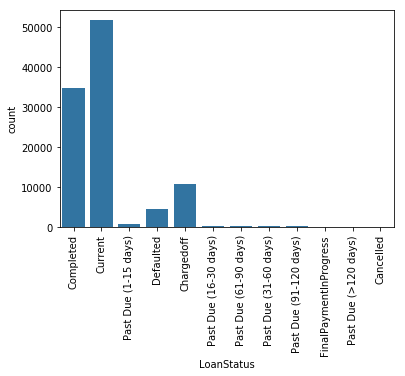

In [32]:
# Distribution plot of LoanStatus in a bar chart
base_color = sb.color_palette()[0]
sb.countplot(data = loandf, x = 'LoanStatus', color = base_color)
plt.xticks(rotation = 90);

> It is seen from the plot that the loan outcome can take upto 12 status: 'Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'FinalPaymentInProgress', 'Past Due (>120 days)' and 'Cancelled'.<br>
However among the 12 status, 'Current' and 'Completed' status are seen to be the ones with highest counts.  <br>

Next up, the predictor variables of interest: EmploymentStatus, StatedMonthlyIncome, DebtToIncomeRatio and OpenCreditLines

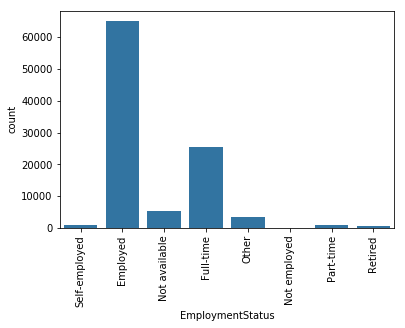

In [33]:
# Distribution plot of EmploymentStatus in a bar chart
sb.countplot(data = loandf, x = 'EmploymentStatus', color = base_color)
plt.xticks(rotation = 90);

From the EmploymentStatus plot, it is seen that among the people who have taken loan, most of the people are either 'Employed' or 'Full-time' i.e., it indicates that they are employed.<br>
However, there are people in the dataset who have other employment status like 'Not available', 'Other', 'Retired', etc, but with lesser count.

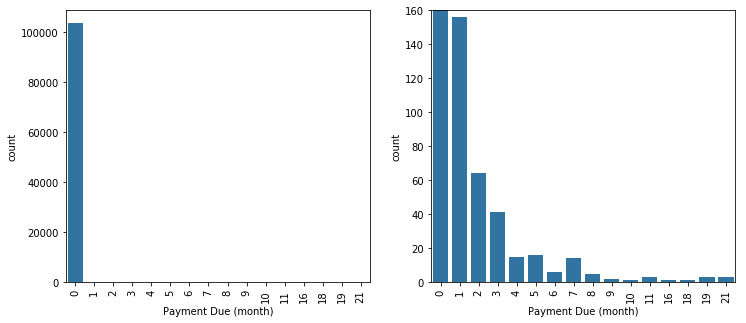

In [34]:
# Distribution plot of ProsperPaymentsOneMonthPlusLate
plt.figure(figsize = [12,5])

# Left Plot: ProsperPaymentsOneMonthPlusLate distribution
plt.subplot(1,2,1)
sb.countplot(data = loandf, x = 'ProsperPaymentsOneMonthPlusLate', color = base_color)
plt.xticks(rotation = 90);
plt.xlabel('Payment Due (month)');

# Right Plot: ProsperPaymentsOneMonthPlusLate distribution considering the y axis range between 0 to 160
plt.subplot(1,2,2)
sb.countplot(data = loandf, x = 'ProsperPaymentsOneMonthPlusLate', color = base_color)
plt.xticks(rotation = 90);
plt.xlabel('Payment Due (month)');
plt.ylim(0,160);

Bar plot is used for ProsperPaymentsOneMonthPlusLate distribution since its values are categorical. We see that there is high count of values at zero which indicates that there is no pending payment i.e., no payment past due date. Whereas the other values ranging from 1 to 21 is an indication of how many months have been since the payment due date. It is seen that large count of people make their payment before the due date. Comparatively there are some people who have missed their due date by 1 month and lesser count of people who have missed their payment with more than 1 month due date.

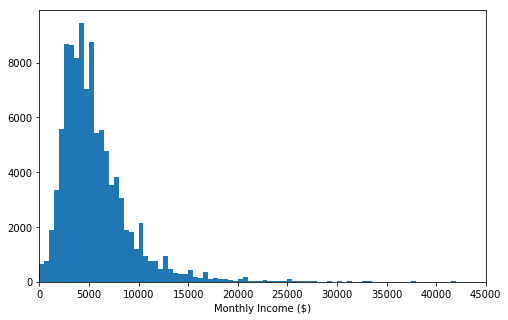

In [35]:
# Distribution plot of StatedMonthlyIncome
binsize = 500
bins = np.arange(0, loandf['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandf, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Monthly Income ($)')
plt.xlim((0,45000))
plt.show()

It is seen from the plot that large number of people in this dataset have monthly income around \$5000. Then theres a long tail upto around $45000. 

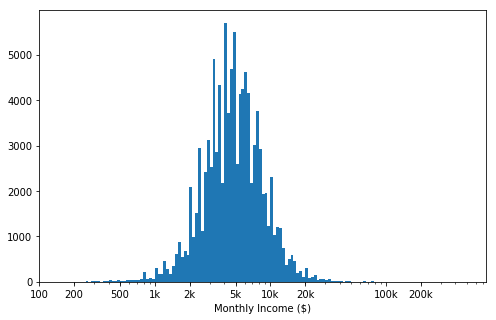

In [36]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(loandf['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandf, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4, 1e5, 2e5], [100,200, 500, '1k', '2k', '5k', '10k', '20k','100k','200k'])
plt.xlabel('Monthly Income ($)')
plt.show()

Monthly Income has a long-tailed distribution, with a lot of people having income below $10,000, and few people having gigher monthly income. When plotted on a log-scale, the Monthly Income distribution looks roughly unimodal, with the peak around 5k. 

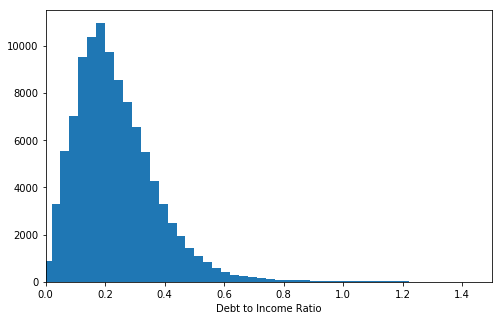

In [37]:
# Distribution plot of DebtToIncomeRatio
binsize = .03
bins = np.arange(-1, loandf['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandf, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.xlim((0,1.5))
plt.show()

In the Debt to Income Ratio plot it is seen that higher number of people have the ratio value around 0.2. The distribution is unimodal with long tail to the right.The DebtToIncomeRatio has a minimum value of 0 and highest value of around 1.2.

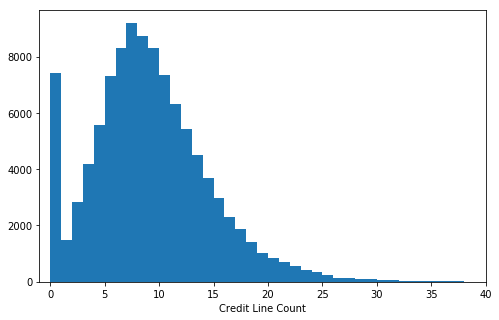

In [38]:
# Distribution plot of OpenCreditLines
binsize = 1
bins = np.arange(-1, loandf['OpenCreditLines'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandf, x = 'OpenCreditLines', bins = bins)
plt.xlabel('Credit Line Count')
plt.xlim((-1,40))
plt.show()

In this OpenCreditLines plot, the distribution is unimodal with peak value at around 8 indicating that large count of people have credit lines ranging 2 to 15. Also, a spike is seen at 0, which is basically of the cases in the dataset for which the OpenCreditLines value was missing (NaN).

2) Next up, I'll look at the distribution of 'BorrowerRate' and factors which seems to affect it: 'LoanOriginalAmount', 'Term', 'CreditScoreRangeLower' and 'CreditScoreRangeUpper'.

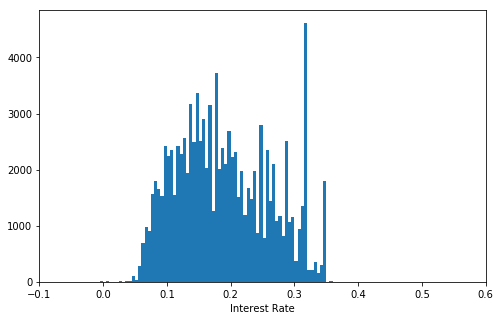

In [39]:
# Distribution plot of BorrowerRate
binsize = .005
bins = np.arange(-1, loandf['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandf, x = 'BorrowerRate', bins = bins)
plt.xlabel('Interest Rate')
plt.xlim((-.1,.6))
plt.show()

The Interest Rate depicted by the 'BorrowerRate' column shows a distribution which is skewed to the right. There are many spikes as the the graph declines to the right. The Interest Rate is majorly seen between .1 to 3.5 values. The abnormal spike seen at around 3.2 is very interesting and will need further analysis to understand the reason for it.

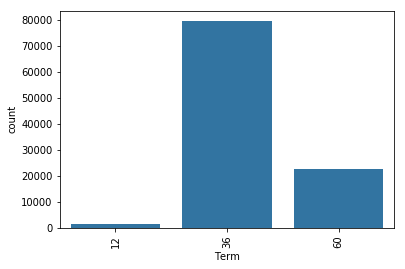

In [40]:
# Distribution plot of 'Term'
sb.countplot(data = loandf, x = 'Term', color = base_color)
plt.xticks(rotation = 90);

For 'Term' column, since there are only 3 discrete values possible: 12,36 and 60, it can be considered categorical values. Hence a bar plot is choosen.It is seen from the plot that very few loans have been termed for 12 months, most of the loan have been given for a repay period of 36 months and around 20000 loans have been given with a repay period of 60 months.

In [41]:
loandf['CreditScoreRangeLower'].max()

880.0

In [42]:
loandf['CreditScoreRangeLower'].min()

0.0

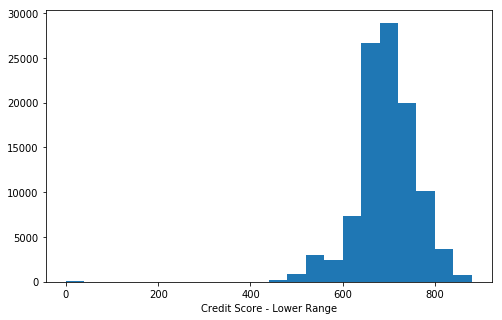

In [43]:
# Distribution plot of 'CreditScoreRangeLower'
binsize = 40
bins = np.arange(0, loandf['CreditScoreRangeLower'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandf, x = 'CreditScoreRangeLower', bins = bins)
plt.xlabel('Credit Score - Lower Range')
plt.show()

From the plot for CreditScoreRangeLower distribution, it is seen that it is a unimodal distribution ranges from 420 to 880. There is a small count of Credit score = 0. The distribution shows that large number of people have credit score - lower range at around 650 to 750.

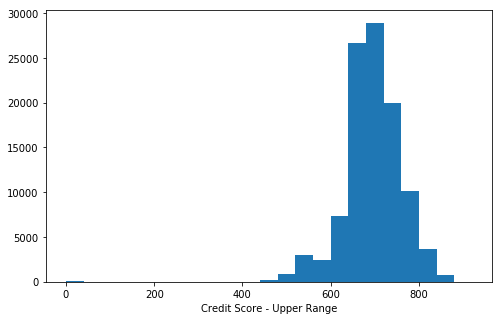

In [44]:
# Distribution plot of 'CreditScoreRangeUpper'
binsize = 40
bins = np.arange(0, loandf['CreditScoreRangeUpper'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandf, x = 'CreditScoreRangeUpper', bins = bins)
plt.xlabel('Credit Score - Upper Range')
plt.show()

From the plot for CreditScoreRangeUpper distribution is very similar to CreditScoreRangeLower, it is seen that it is a unimodal distribution ranges from 420 to 880. There is a small count of Credit score = 0. The distribution shows that large number of people have credit score - lower range at around 650 to 750.

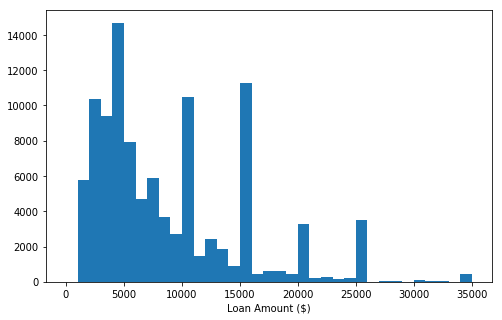

In [45]:
# Distribution of LoanOriginalAmount
binsize = 1000
bins = np.arange(0, loandf['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandf, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount ($)')
plt.show()

From the histogram plot for Loan Amount distribution, it is seen that the amount that has been loaned ranges from around  1000to1000to 35000. Loan amount preferred by large number of people is between  2000to2000to 7000. There are spikes seen in the plot indicating that loan amount of  11000,11000, 15000,  20000and20000and 25000 have also been preferred by some amount of people.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The 'LoanStatus' variable takes 12 different values and the 'BorrowerRate' variable takes a range of values between .1 to.35. There is an unusal spike seen at around .35. This can be due to the high number of people take the same LoanOriginalAmount.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the variables like CreditScoreRangeUpper, CreditScoreRangeLower, OpenCreditLines, DebtToIncomeRatio and StatedMonthlyIncome, it was seen that there were missing data which would cause the analysis to be misinterpreted. So, missing data in OpenCreditLines column is replaced by 0 and in the other four columns where data were missing, the corresponding rows have been dropped.

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features: LoanStatus and the factors which seem to be helpful in predicting it: 'EmploymentStatus','StatedMonthlyIncome', 'DebtToIncomeRatio' and 'OpenCreditLines'

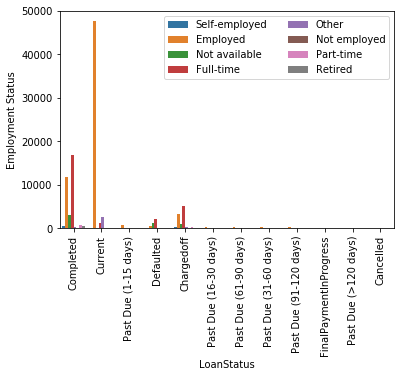

In [46]:
# Relationship between LoanStatus and EmploymentStatus
ax = sb.countplot(data = loandf, x = 'LoanStatus', hue = 'EmploymentStatus');
ax.legend(loc = 1,ncol = 2 );
plt.xticks(rotation = 90);
plt.ylabel('Employment Status');

The Bar chart shows the relationship between LoanStatus and Employment status of the people who have taken loan. It is seen that the Loan status:'Completed', 'Current', 'Chargedoff' and 'Defaulted' are related mostly to 'Employed' and 'Full-time' employment status. Whereas the other Loan status is barely minimal. It can be inferred that people with employment status: 'Employed' and 'Full-time' are the ones who are given loans at a high frequency.

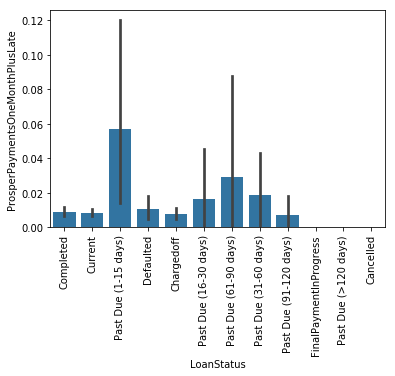

In [47]:
# Distribution plot of ProsperPaymentsOneMonthPlusLate vs LoanStatus
sb.barplot(data = loandf, x = 'LoanStatus', y = 'ProsperPaymentsOneMonthPlusLate', color = base_color);
plt.xticks(rotation=90);

It can seen from the distribution that when the payment of the loan is delayed for more than 1 month, then loan outcome status is usually 'Past Due certain number of days'. In rare cases, the outcome is 'Completed' or 'Current'.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

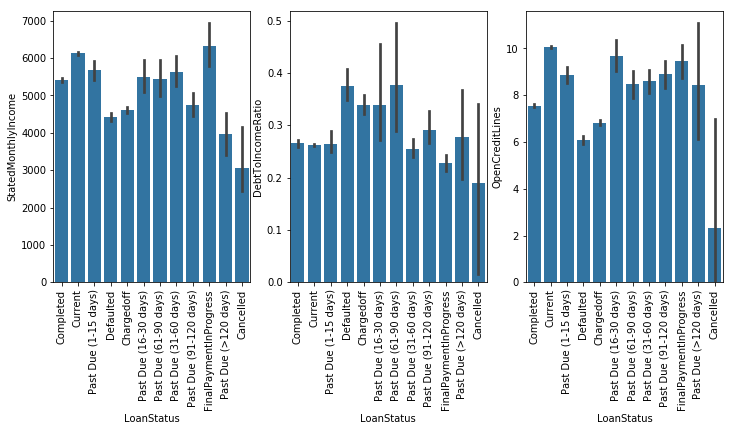

In [48]:
# Relationship between LoanStatus and StatedMonthlyIncome, DebtToIncomeRatio and OpenCreditLines
plt.figure(figsize = [12,5])

# Relationship between LoanStatus and StatedMonthlyIncome using Barplot
plt.subplot(1,3,1)
sb.barplot(data = loandf, x = 'LoanStatus', y = 'StatedMonthlyIncome', color = base_color);
plt.xticks(rotation=90)

# Relationship between LoanStatus and DebtToIncomeRatio using Barplot
plt.subplot(1,3,2)
sb.barplot(data = loandf, x = 'LoanStatus', y = 'DebtToIncomeRatio', color = base_color);
plt.xticks(rotation=90)

# Relationship between LoanStatus and OpenCreditLines using Barplot
plt.subplot(1,3,3)
sb.barplot(data = loandf, x = 'LoanStatus', y = 'OpenCreditLines', color = base_color);
plt.xticks(rotation=90)

Barplot representation of the Relationship between LoanStatus and StatedMonthlyIncome, DebtToIncomeRatio and OpenCreditLines.

From the relationship between LoanStatus and StatedMonthlyIncome, it is seen that people with monthly income greater than $5000 have either completed their loan or are currently in progress. But it also seen that people with this income range are also included among the ones who have not paid their loan amount even after the due date. So it is harder to predict the loan outcome status only based on StatedMonthly income. However it is seen that the people whose loan was cancelled, Defaulted, Chargedoff and past due 120 days have lower monthly income, which can be a reason for their inability to pay back the loan.

From the relationship between LoanStatus and DebtToIncomeRatio, it is seen that people who haveloan status as completed, current, final payment in progress and cancelled have lower debt to income ratio, which is a good indication overall. People with loan status: Defaulted, Chargedoff and past due certain number of days have higher debt to income ratio. However, it is seen that people who have failed to pay their loan past 31 to 60 days also low debt to income ratio. This shows that debt to income ratio is good indicator of loan outcome status to some extent, but it is alone not enough to predict the loan outcome.

From the relationship between LoanStatus and OpenCreditLines, it is seen that people who have completed the loan have more than 5 open credit lines. Similarly people paying the final loan payment, currently paying as well as the ones who have past the due date have more than 5 open credit lines. The people with cancelled loan status are the only ones with lesser open credit lines. So, OpenCreditLines factor does not seem to be a good indicator in predicting the loan outcome status.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

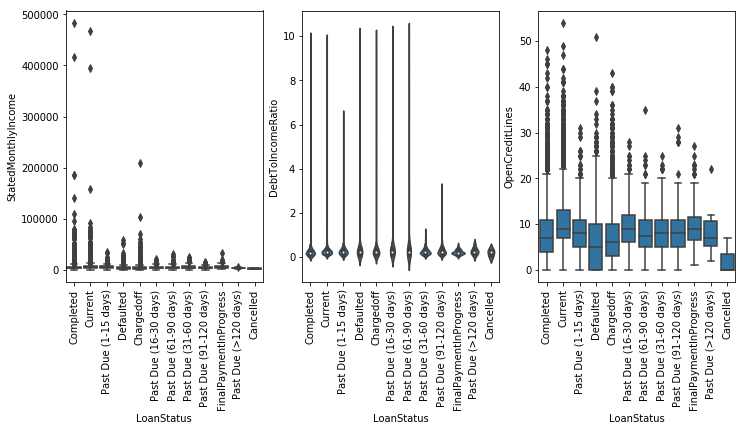

In [49]:
# Relationship between LoanStatus and StatedMonthlyIncome, DebtToIncomeRatio and OpenCreditLines
plt.figure(figsize = [12,5])

# Relationship between LoanStatus and StatedMonthlyIncome using Boxplot
plt.subplot(1,3,1)
sb.boxplot(data = loandf, x = 'LoanStatus', y = 'StatedMonthlyIncome', color = base_color);
plt.xticks(rotation=90)

# Relationship between LoanStatus and DebtToIncomeRatio using Violinplot
plt.subplot(1,3,2)
sb.violinplot(data = loandf, x = 'LoanStatus', y = 'DebtToIncomeRatio', color = base_color);
plt.xticks(rotation=90)

# Relationship between LoanStatus and OpenCreditLines using Boxplot
plt.subplot(1,3,3)
sb.boxplot(data = loandf, x = 'LoanStatus', y = 'OpenCreditLines', color = base_color);
plt.xticks(rotation=90)

Analyzing the relationship between LoanStatus and StatedMonthlyIncome, DebtToIncomeRatio, OpenCreditLines using Boxplot and Violinplot shows similar ideas as seen in Barplot. It is seen that the median is same for all loan status when considered w.r.t StatedMonthlyIncome and also w.r.t. DebtToIncomeRatio. However the median level in the plot for LoanStatus and OpenCreditLines is very irregular, so it can be considered as not a good fit for predicting the loan outcome status.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

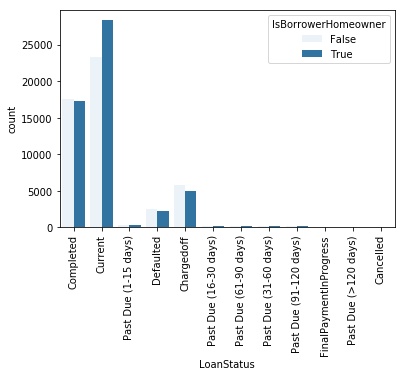

In [50]:
# Relationship between loan outcome status with the person being a house owner
sb.countplot(data = loandf, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', color = base_color);
plt.xticks(rotation=90)

Being a house owner does not help in predicting the loan outcome status since the result is almost similar when a person owns a house and when a person does not own a house.

Next, lets look at the relationship between borrower's interest rate 'BorrowerRate' and the factors which seem to be a predictor to it: LoanOriginalAmount, Term, CreditScoreRangeLower and CreditScoreRangeUpper.

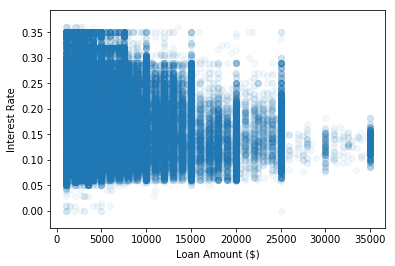

In [51]:
# Relationship between BorrowerRate and LoanOriginalAmount
plt.scatter(data = loandf, x = 'LoanOriginalAmount', y = 'BorrowerRate', alpha = .05);
plt.ylabel('Interest Rate')
plt.xlabel('Loan Amount ($)');

From the scatterplot, the distribution of Interest Rate w.r.t Loan Amount is depicted. It is seen that interest rate can range from .05 to .35 in value. However, higher loan amount is not charged high interest. Whereas high interest is charged for a loan amount upto $5000 and interest rate reduces as loan amount increases. So, it can be said that Loan amount is a good factor in predicting interest rate but it is not solely dependent on the loan amount.

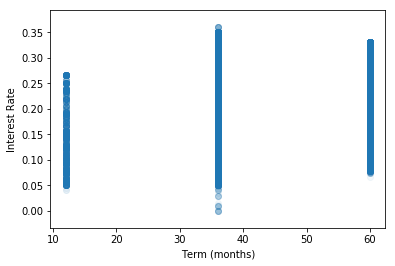

In [52]:
# Relationship between BorrowerRate and Term
plt.scatter(data = loandf, x = 'Term', y = 'BorrowerRate', alpha = .05);
plt.ylabel('Interest Rate')
plt.xlabel('Term (months)');

From the scatterplot describing the relationship between Term and Interest Rate, it is seen that we have 3 terms in months: 12 , 36 and 60. <br>
For loan termed for 12 months, the interest rate ranges from .05 to .27<br>
For loan termed for 36 months, the interest rate ranges from .05 to .36<br>
For loan termed for 60 months, the interest rate ranges from .08 to .33<br>
So, it can be inferred that for a lower term loan (12 month), interest rate is lower compared to the higher term loan. But it is also dependent on other factors since we see that in each term the interest rate variation is seen over a wide range.

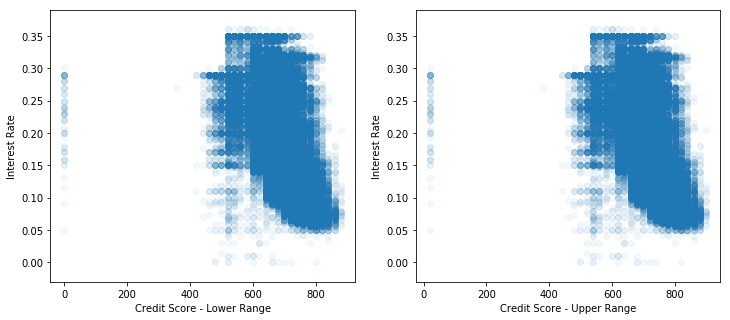

In [53]:
# Relationship between BorrowerRate and CreditScoreRangeLower, CreditScoreRangeUpper

plt.figure(figsize = [12,5])

# Left Plot:Relationship between BorrowerRate and CreditScoreRangeLower using Scatterplot
plt.subplot(1,2,1)
plt.scatter(data = loandf, x = 'CreditScoreRangeLower', y = 'BorrowerRate', alpha = .05);
plt.ylabel('Interest Rate')
plt.xlabel('Credit Score - Lower Range');

# Right Plot: Relationship between BorrowerRate and CreditScoreRangeUpper using Scatterplot
plt.subplot(1,2,2)
plt.scatter(data = loandf, x = 'CreditScoreRangeUpper', y = 'BorrowerRate', alpha = .05);
plt.ylabel('Interest Rate')
plt.xlabel('Credit Score - Upper Range');

From the scatterplot, it is seen that relationship between Credit Score- Lower Range and Interest Range is similar to that of Credit Score- Upper Range and Interest Range. From the distribution it is clearly seen that for lower credit score around 400 to 650, interest rate is high around .35. Then as the credit score increases upto 880, the interest rate reduces to .05. So, it can inferred that credit score is a good contributor in deciding the Interest Rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> LoanStatus has an interesting relationship with EmploymentStatus, ProsperPaymentsOneMonthPlusLate, StatedMonthlyIncome and DebtToIncomeRatio. Each of these factors do contribute to some level in deciding the Loan Outcome Status. However, OpenCreditLines did not contribute in predicting the Loan Outcome Status. <br>
> BorrowerRate has an interesting relationship with LoanOriginalAmount, CreditScoreRangeLower and CreditScoreRangeUpper. These factors help in predicitng the interest rate. Term has some contribution in estimating the Interest Rate, but it does not seem to be a strong relationship.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The variable IsBorrowerHomeowner has been considered by the loan providing authority when collecting a person information, and seems to be major differentiator in loan outcome status since owning a house is an asset. But when analysed in the plot, it can be seen that people who own and who do not own a house repay their loan in a similar manner. So IsBorrowerHomeowner is not a contributor in predicting the loan outcome status.

## Multivariate Exploration

Relationship between LoanStatus, EmploymentStatus, StatedMonthlyIncome and DebtToIncomeRatio will be explored.

Relationship between BorrowerRate, LoanOriginalAmount and CreditScoreRangeLower will be explored to ensure that the Interest Rate can be predicted based on factors: LoanOriginalAmount and CreditScoreRangeLower.

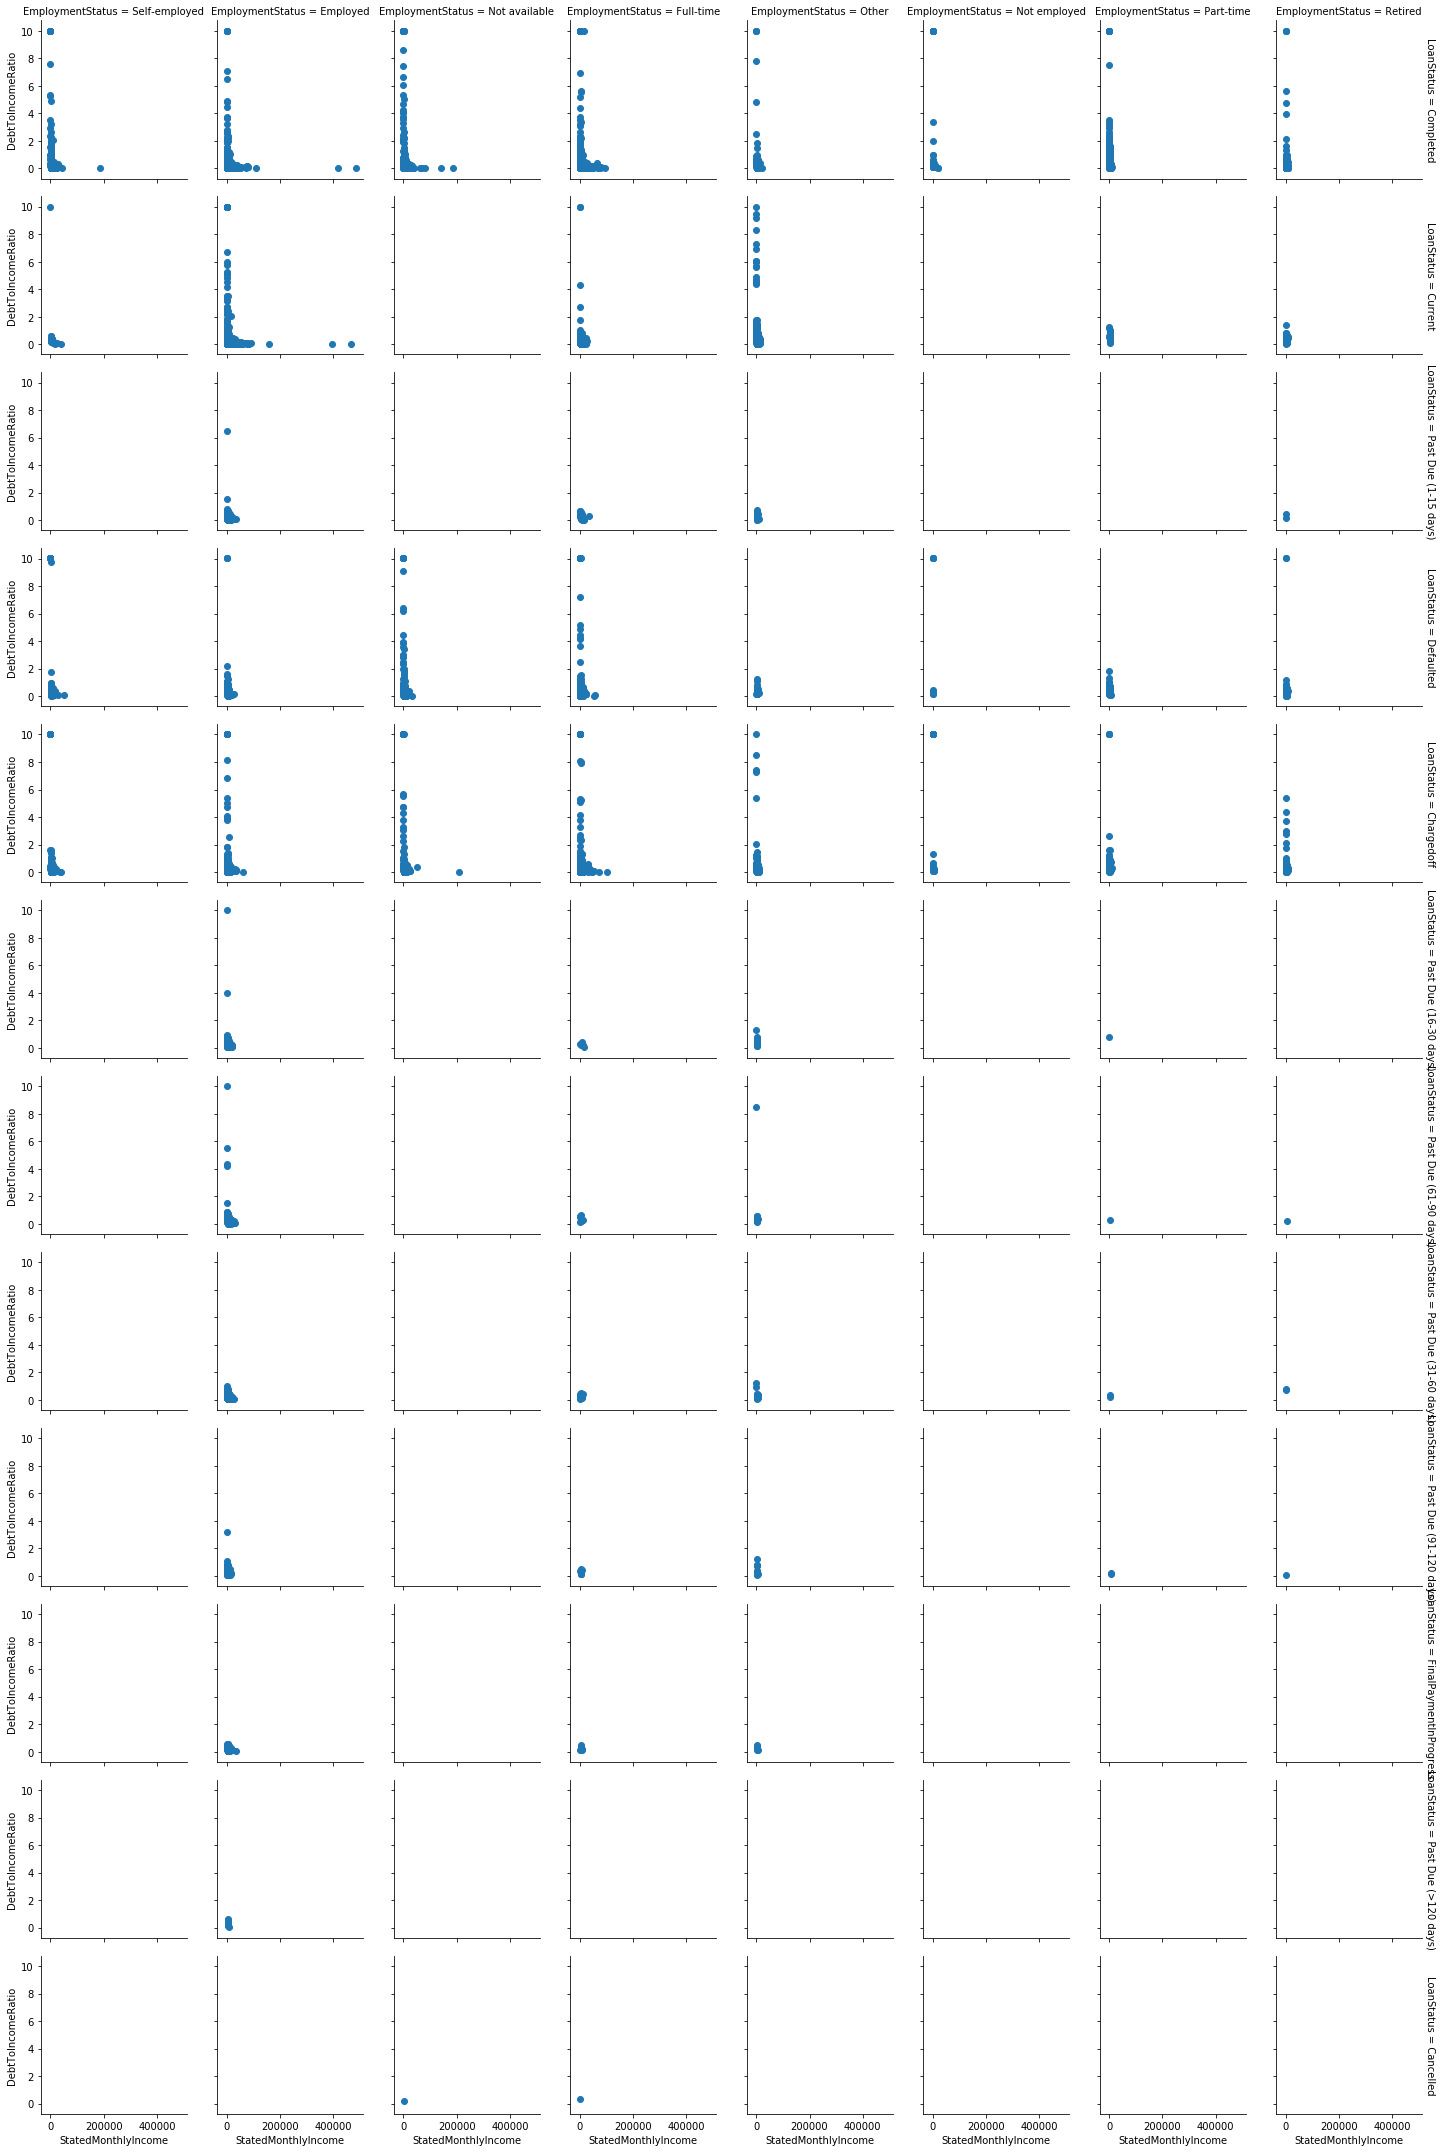

In [54]:
g = sb.FacetGrid(data = loandf, col = 'EmploymentStatus', row = 'LoanStatus', size = 2.5, margin_titles = True);
g.map(plt.scatter, 'StatedMonthlyIncome', 'DebtToIncomeRatio');

In the FacetGrid plotted to map the relationship between LoanStatus, EmploymentStatus, StatedMonthlyIncome and DebtToIncomeRatio, it is seen that when a person has active employment status with low debt to income ratio and salary above $5000, then the loan status is either completed, current, defaulted, or chargedoff. In other cases, the loan status is either cancelled or past due date by certain number of days. <br>
This allows us to infer that EmploymentStatus, StatedMonthlyIncome and DebtToIncomeRatio are good factors for predicting the loan outcome status.

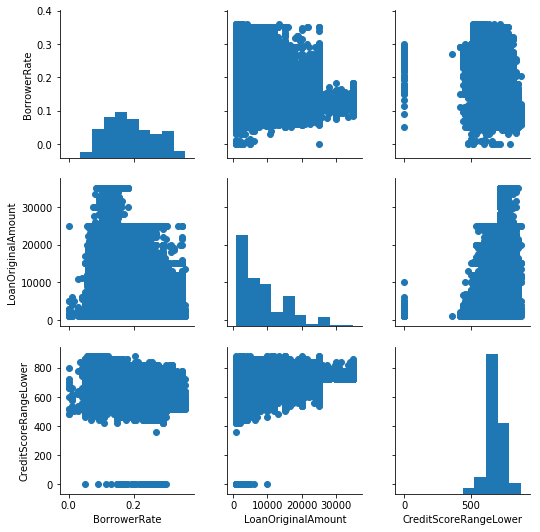

In [55]:
# Relationship between Interest Rate i.e., BorrowerRate and LoanOriginalAmount,CreditScoreRangeLower
g = sb.PairGrid(data = loandf, vars = ['BorrowerRate','LoanOriginalAmount','CreditScoreRangeLower']);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

Grid plot shows a matrix with the BorrowerRate, LoanOriginalAmount and CreditScoreRangeLower. The relationship seen is similar to the relation seen in the Bivariate exploration section.

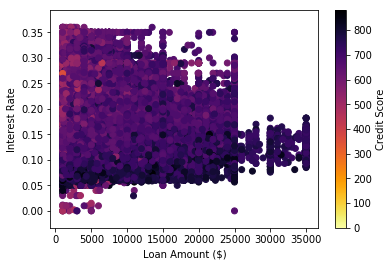

In [56]:
# create scatter to determine the relationship between BorrowerRate, LoanOriginalAmount and CreditScoreRangeLower
plt.scatter(data = loandf, x = 'LoanOriginalAmount', y= 'BorrowerRate', c = 'CreditScoreRangeLower',cmap = 'inferno_r');
plt.xlabel('Loan Amount ($)')
plt.ylabel('Interest Rate');
plt.colorbar(label = 'Credit Score');

The scatter plot shows the relationship between BorrowerRate, LoanOriginalAmount and CreditScoreRangeLower. It can be seen that with the increase in loan amount (from left to right) and increase in credit score (change in color from yellow to purple to black), the interest rate reduces. <br>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship observed in Multivariate exploration are LoanStatus, EmploymentStatus, StatedMonthlyIncome and DebtToIncomeRatio. The features: EmploymentStatus, StatedMonthlyIncome and DebtToIncomeRatio contributed in predicting loan outcome status. It is seen that when a person has active employment status with low debt to income ratio and salary above 5k, then the loan status is either completed, current, defaulted, or chargedoff. In other cases, the loan status is either cancelled or past due date by certain number of days.

> The relationship between BorrowerRate, LoanOriginalAmount and CreditScoreRangeLower is also observed. Based on the analysis, it can be inferred that: <br>
when a person who have high credit score applies for a loan of a big amount, he is given the loan at a lower interest rate. <br>
when a person with average credit score applies for a loan of a small amount, he is given the loan at a high interest rate. <br>
There is no cases of loan, for a person with low credit score. <br>

> So it can inferred that if a person is applying for loan of a large amount, then it is necessary to have a high credit score as seen in the above plot, also inorder to ensure the loan status is going to be positive, it is necessary that the person applying for loan to have active employment status, low debt to income ratio and higher income. 

### Were there any interesting or surprising interactions between features?

> Surprisingly, features: CreditScoreRangeLower, DebtToIncomeRatio, EmploymentStatus and StatedMonthlyIncome seem to be the most important factor in determining the overall loan outcome status and interest rate. Whereas features such as IsBorrowerHomeowner and OpenCreditLines did not turn as important as it might have initially seen.